<a href="https://colab.research.google.com/github/aashath0317/Extract-and-archive-using-colab/blob/main/Simple_Usefull_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




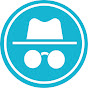


---

# **C2P TECH**
[**Subscribe Our Channel**](https://www.youtube.com/channel/UCJVrPRNqzGPQfG57H-vgz0w)

**Tutorial**(soon)






In [ ]:
#@title RUN ME 1ST
import os
import subprocess
from pathlib import Path
import glob
import pathlib
import time
import datetime
!python -m pip install --upgrade pip setuptools wheel && python -m pip install lbry-libtorrent && apt install python3-libtorrent
!apt-get install rar


In [ ]:
#@markdown Do you have <b>rclone.conf</b> file?

answer = "yes" # @param ["yes","no"]

if answer == "no":
  !rclone config
else:
  Setup_Time_Zone = False 

  import os; from google.colab import files; from IPython.display import HTML, clear_output

  def upload_conf():
    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#446785;\">Please upload the config file of rclone (rclone.conf) from your computer.</h2><br>"))
      UploadConfig = files.upload().keys()
      clear_output(wait=True)
      if len(UploadConfig) == 0:
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been cancelled during upload file.</h2><br></center>"))
      elif len(UploadConfig) == 1:
        for fn in UploadConfig:
          if os.path.isfile("/content/" + fn) == True:
            os.environ["rclone_conf"] = fn
            !mv -f "$rclone_conf" /root/.rclone.conf
            !chmod 666 /root/.rclone.conf
            if Setup_Time_Zone == True:
              !sudo dpkg-reconfigure tzdata
              clear_output(wait=True)
            if os.path.isfile("/usr/bin/rclone") == True:
              return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">Config has been changed.</h2><br></center>"))
            else:
              !rm -rf /content/sample_data/
              !curl -s https://rclone.org/install.sh | sudo bash
              clear_output(wait=True)
              return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#446785;\">Installation has been successfully completed.</h2><br></center>"))
          else:
            return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been failed during upload file.</h2><br></center>"))
      else:
        for fn in UploadConfig:
          os.environ["rclone_conf"] = fn
          !rm -f "$rclone_conf"
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Please uploading only one file at a time.</h2><br></center>"))
    except:
      clear_output(wait=True)
      return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Error occurred during upload file.</h2><br></center>"))

  upload_conf()


In [ ]:
#@title ⬅️ Mount Your Drives Using Rclone
# ============================= FORM ============================= #
#@markdown 
rclone_config_name = "webdrive" #@param {type:"string"}
local_mount_location = "/content/webdav" #@param {type:"string"}
# ============================= FORM ============================= #
import time
import os

# clear nohup
open("nohup.out", 'w').close()


# unmount first

!fusermount -u $local_mount_location 2>/dev/null


# mount without waiting for the command to complete
!mkdir $local_mount_location 2>/dev/null
!nohup rclone mount $rclone_config_name: $local_mount_location --buffer-size 96M & 
  


# Show the output that was written to nohup
time.sleep(3)
f = open(r"nohup.out", "r")
nohupText = f.read()
f.close()


dirs = os.listdir(local_mount_location)

if len(dirs) > 0:
  clear_output(wait=True)
  print("Succeeded. ", str(len(dirs)), "dirs found at", local_mount_location)

else:
  print("\n\nNot succeeded. No files or directories in mounted location. \nCheck your config name and content. If the rclone command was not found, run the cell above.\n\n")
  print("log:\n", nohupText)
Execution output from Oct 11, 2021 1:32 PM
0KB
	Stream
		Succeeded.  10 dirs found at /content/webdav

Code cell <dj5c7o34wzuP>
#%% [code]
#@title ⬅️ Torrent File Downloader
Dir = ""
def download_torrent():

    ses = lt.session()
    ses.listen_on(6881, 6891)
    link = "magnet:?xt=urn:btih:E04831E40D83F6A1897DCC8A5B9F47DC046FB551&dn=Metroid+Dread+%28%2B+Yuzu%2FRyujinx+Emus+for+PC%2C+MULTi10%29+%5BFitGirl+Repack%5D&tr=udp%3A%2F%2F46.148.18.250%3A2710&tr=udp%3A%2F%2Fopentor.org%3A2710&tr=udp%3A%2F%2Ftracker.coppersurfer.tk%3A6969%2Fannounce&tr=udp%3A%2F%2Ftracker.opentrackr.org%3A1337%2Fannounce&tr=http%3A%2F%2Ftracker.dler.org%3A6969%2Fannounce&tr=udp%3A%2F%2Ftracker.leechers-paradise.org%3A6969%2Fannounce&tr=udp%3A%2F%2F9.rarbg.me%3A2730%2Fannounce&tr=udp%3A%2F%2F9.rarbg.to%3A2770%2Fannounce&tr=udp%3A%2F%2Ftracker.pirateparty.gr%3A6969%2Fannounce&tr=http%3A%2F%2Fretracker.local%2Fannounce&tr=http%3A%2F%2Fretracker.ip.ncnet.ru%2Fannounce&tr=udp%3A%2F%2Fexodus.desync.com%3A6969%2Fannounce&tr=udp%3A%2F%2Fipv4.tracker.harry.lu%3A80%2Fannounce&tr=udp%3A%2F%2Fopen.stealth.si%3A80%2Fannounce&tr=udp%3A%2F%2Ftracker.zer0day.to%3A1337%2Fannounce&tr=udp%3A%2F%2Ftracker.leechers-paradise.org%3A6969%2Fannounce&tr=udp%3A%2F%2Fcoppersurfer.tk%3A6969%2Fannounce" # @param {type:"string"}
    Dir = "/content/webdav/torrent/" # @param {type:"string"}
    print(link)

    handle = lt.add_magnet_uri(ses, link, params)
    # change the 0 to a 1 to download sequential - this sequential option is only if you selected zip. If not,
    # scroll farther down.
    handle.set_sequential_download(0)

    ses.start_dht()
    begin = time.time()
    print(datetime.datetime.now())

    print('Downloading Metadata...')
    while not handle.has_metadata():
        time.sleep(1)
    print('Got Metadata, Starting Torrent Download...')

    print("Starting", handle.name())

    while handle.status().state != lt.torrent_status.seeding:
        s = handle.status()
        state_str = ['queued', 'checking', 'downloading metadata',
                     'downloading', 'finished', 'seeding', 'allocating']
        print('%.2f%% complete (down: %.1f kb/s up: %.1f kB/s peers: %d) %s ' % \
              (s.progress * 100, s.download_rate / 1000, s.upload_rate / 1000, \
               s.num_peers, state_str[s.state]))
        time.sleep(0.5)
        output.clear()

    end = time.time()
    print(handle.name(), "COMPLETE")

    print("Elapsed Time: ", int((end - begin) // 60), "min :", int((end - begin) % 60), "sec")

    print(datetime.datetime.now())


zipp = input("Input 'Y'/'y' to zip the torrent and place it in your drive. Otherwise, leave blank. ")

if zipp == 'Y' or zipp == 'y':
    zip_name = input("Input name you would like for the zip file: ")
    import shutil

    params = {
        'save_path': '/content/temp/',
        'storage_mode': lt.storage_mode_t(2),
    }
    download_torrent()

    print("now time to zip")

    print("Zipping ...")
    final_zip_directory = Dir + zip_name
    shutil.make_archive(final_zip_directory, 'zip', '/content/temp/')
    shutil.rmtree('/content/temp/')

else:
    params = {
        'save_path': Dir,
        'storage_mode': lt.storage_mode_t(2),
    }
    download_torrent()

print('\nALL DONE!')



**m_path** = you file or folder path

> 


**split_size** = add only number if you add 1 is 1 GB file split.


> 

**password**  = archive password

In [ ]:
#@title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#@title ⬅️  Download From YouTube
# ============================= FORM ============================= #
#@markdown 
Archive = False #@param {type:"boolean"}
# ================================================================ #

import os, uuid, urllib.parse
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files

Links = widgets.Textarea(placeholder='''Video/Playlist Link
(one link per line)''')

VideoQ = widgets.Dropdown(options=["Best Quality (VP9 upto 4K)", "Best Compatibility (H.264 upto 1080p)"])

AudioQ = widgets.Dropdown(options=["Best Quality (Opus)", "Best Compatibility (M4A)"])

Subtitle = widgets.ToggleButton(value=True, description="Subtitle", button_style="info", tooltip="Subtitle")

directory1 = "" # 
directory2 = ""
SavePathYT = widgets.Dropdown(options=[directory1, directory2])

AudioOnly = widgets.ToggleButton(value=False, description="Audio Only", button_style="", tooltip="Audio Only")

Resolution = widgets.Select(options=["Highest", "4K", "1440p", "1080p", "720p", "480p", "360p", "240p", "144p"], value="Highest")

Extension = widgets.Select(options=["mkv", "webm"], value="mkv")

UsernameYT = widgets.Text(placeholder="Username")

PasswordYT = widgets.Text(placeholder="Password")

SecAuth = widgets.Text(placeholder="2nd Factor Authentication")

VideoPW = widgets.Text(placeholder="Video Password")

GEOBypass = widgets.Dropdown(options=["Disable", "Hide", "AD", "AE", "AF", "AG", "AI", "AL", "AM", "AO", "AQ", "AR", "AS", "AT", "AU", "AW", "AX", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BL", "BM", "BN", "BO", "BQ", "BR", "BS", "BT", "BV", "BW", "BY", "BZ", "CA", "CC", "CD", "CF", "CG", "CH", "CI", "CK", "CL", "CM", "CN", "CO", "CR", "CU", "CV", "CW", "CX", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "EH", "ER", "ES", "ET", "FI", "FJ", "FK", "FM", "FO", "FR", "GA", "GB", "GD", "GE", "GF", "GG", "GH", "GI", "GL", "GM", "GN", "GP", "GQ", "GR", "GS", "GT", "GU", "GW", "GY", "HK", "HM", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IM", "IN", "IO", "IQ", "IR", "IS", "IT", "JE", "JM", "JO", "JP", "KE", "KG", "KH", "KI", "KM", "KN", "KP", "KR", "KW", "KY", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT", "LU", "LV", "LY", "MA", "MC", "MD", "ME", "MF", "MG", "MH", "MK", "ML", "MM", "MN", "MO", "MP", "MQ", "MR", "MS", "MT", "MU", "MV", "MW", "MX", "MY", "MZ", "NA", "NC", "NE", "NF", "NG", "NI", "NL", "NO", "NP", "NR", "NU", "NZ", "OM", "PA", "PE", "PF", "PG", "PH", "PK", "PL", "PM", "PN", "PR", "PS", "PT", "PW", "PY", "QA", "RE", "RO", "RS", "RU", "RW", "SA", "SB", "SC", "SD", "SE", "SG", "SH", "SI", "SJ", "SK", "SL", "SM", "SN", "SO", "SR", "SS", "ST", "SV", "SX", "SY", "SZ", "TC", "TD", "TF", "TG", "TH", "TJ", "TK", "TL", "TM", "TN", "TO", "TR", "TT", "TV", "TW", "TZ", "UA", "UG", "UM", "US", "UY", "UZ", "VA", "VC", "VE", "VG", "VI", "VN", "VU", "WF", "WS", "YE", "YT", "ZA", "ZM", "ZW"])

ProxyYT = widgets.Text(placeholder="Proxy URL")

MinSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Min:")

MaxSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Max:")

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def upload_archive():
  if ask_yes_no("Do you already have an archive file? (y/n)", default="", interrupt=""):
    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Please upload an archive from your computer.</h2><br>"))
      UploadConfig = files.upload().keys()
      clear_output(wait=True)
      if len(UploadConfig) == 0:
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been cancelled during upload file.</h2><br></center>"))
      elif len(UploadConfig) == 1:
        for fn in UploadConfig:
          if os.path.isfile("/content/" + fn):
            get_ipython().system_raw("mv -f " + "\"" + fn + "\" /root/.youtube-dl.txt && chmod 666 /root/.youtube-dl.txt")
            AudioOnly.observe(AudioOnlyChange)
            Subtitle.observe(SubtitleChange)
            AudioQ.observe(AudioQChange)
            ShowYT()
          else:
            return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been failed during upload file.</h2><br></center>"))
      else:
        for fn in UploadConfig:
          get_ipython().system_raw("rm -f " + "\"" + fn + "\"")
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Please uploading only one file at a time.</h2><br></center>"))
    except:
      clear_output(wait=True)
      return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Error occurred during upload file.</h2><br></center>"))
  else:
    get_ipython().system_raw("touch '/root/.youtube-dl.txt'")
    AudioOnly.observe(AudioOnlyChange)
    Subtitle.observe(SubtitleChange)
    AudioQ.observe(AudioQChange)
    ShowYT()

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content", "/content/Downloads"]

def AudioOnlyChange(change):
  if change["type"] == "change" and change["new"]:
    VideoQ.disabled = True
    Subtitle.disabled = True
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = True
    Extension.options = ["best", "aac", "flac", "mp3", "m4a", "opus", "vorbis", "wav"]
    Extension.value = "best"
    AudioOnly.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    VideoQ.disabled = False
    Subtitle.disabled = False
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = False
    if AudioQ.value == "Best Quality (Opus)":
      Extension.options = ["mkv", "webm"]
    else:
      Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"
    AudioOnly.button_style = ""

def SubtitleChange(change):
  if change["type"] == "change" and change["new"]:
    Subtitle.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    Subtitle.button_style = ""

def AudioQChange(change):
  if change["type"] == "change" and change["new"] == "Best Quality (Opus)":
    Extension.options = ["mkv", "webm"]
    Extension.value = "mkv"
  elif change["type"] == "change" and change["new"] == "Best Compatibility (M4A)":
    Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"

def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  display(widgets.HBox([widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      widgets.HTML("<b style=\"color:#888888;\">For website that require an account:</b>"), UsernameYT, PasswordYT, SecAuth, VideoPW,
                                      widgets.HTML("<b><a href=\"https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements\" target=\"_blank\">GEO Bypass Country:</a></b>"), GEOBypass,
                                      widgets.HTML("<b style=\"color:#888888;\">Proxy:</b>"), ProxyYT,
                                      widgets.HTML("<b style=\"color:#888888;\">Sleep Interval (second):</b>"), MinSleep, MaxSleep]),
                        widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Video Quality:</b>"), VideoQ, widgets.HTML("<b style=\"color:#888888;\">Resolution:</b>"), Resolution,
                                      widgets.HTML("<b style=\"color:#888888;\">Audio Quality:</b>"), AudioQ, widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Options:</b>"), widgets.HBox([Subtitle, AudioOnly]),
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), ExtraArg])]), HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"),
          SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    # Account Check
    if UsernameYT.value.strip() and PasswordYT.value.strip():
      accountC = "--username \"" + UsernameYT.value + "\" --password \"" + PasswordYT.value + "\""
    else:
      accountC = ""
    if SecAuth.value.strip():
      secauthC = "-2 " + SecAuth.value
    else:
      secauthC = ""
    if VideoPW.value.strip():
      videopwC = "--video-password " + VideoPW.value
    else:
      videopwC = ""
    # Proxy
    if ProxyYT.value.strip():
      proxyytC = "--proxy " + ProxyYT.value
    else:
      proxyytC = ""
    # GEO Bypass
    if GEOBypass.value == "Disable":
      geobypass = ""
    elif GEOBypass.value == "Hide":
      geobypass = "--geo-bypass"
    else:
      geobypass = "--geo-bypass-country " + GEOBypass.value
    # Video Quality
    if VideoQ.value == "Best Quality (VP9 upto 4K)":
      videoqC = "webm"
    else:
      videoqC = "mp4"
    # Audio Quality
    if AudioQ.value == "Best Quality (Opus)":
      audioqC = "webm"
    else:
      audioqC = "m4a"
    # Audio Only Check
    if AudioOnly.value:
      subtitleC = ""
      thumbnailC = ""
      extC = "-x --audio-quality 0 --audio-format " + Extension.value
      codecC = "bestaudio[ext=" + audioqC + "]/bestaudio/best"
    else:
      if Subtitle.value:
        subtitleC = "--all-subs --convert-subs srt --embed-subs"
      else:
        subtitleC = ""
      if Extension.value == "mp4":
        thumbnailC = "--embed-thumbnail"
      else:
        thumbnailC = ""
      extC = "--merge-output-format " + Extension.value
      if Resolution.value == "Highest":
        codecC = "bestvideo[ext=" + videoqC + "]+bestaudio[ext=" + audioqC + "]/bestvideo+bestaudio/best"
      else:
        codecC = "bestvideo[ext=" + videoqC + ",height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio[ext=" + audioqC + "]/bestvideo[height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio/bestvideo+bestaudio/best"
    # Archive
    if os.path.isfile("/root/.youtube-dl.txt"):
      archiveC = "--download-archive \"/root/.youtube-dl.txt\""
    else:
      archiveC = ""
    # Sleep Interval
    if MinSleep.value > 0 and MaxSleep.value > 0:
      minsleepC = "--min-sleep-interval " + MinSleep.value
      maxsleepC = "--max-sleep-interval " + MaxSleep.value
    else:
      minsleepC = ""
      maxsleepC = ""
    # Extra Arguments
    extraargC = ExtraArg.value
    for Link in Links.value.splitlines():
      clear_output(wait=True)
      Count += 1
      display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Processing link " + str(Count) + " out of " + Total + "</h3>"))
      if "youtube.com" in Link or "youtu.be" in Link:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading...</h3><br>"), YouTubeVideo(Link, width=640, height=360), HTML("<br>"))
      else:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading <a href=\"" + Link + "\">" + Link + "</a></h3><br>"))
      if ("youtube.com" in Link or "youtu.be" in Link) and "list=" in Link:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(playlist)s/%(playlist_index)s - %(title)s.%(ext)s" "$Link"
      else:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(title)s.%(ext)s" "$Link"
      if not os.path.exists(SavePathYT.value):
        get_ipython().system_raw("mkdir -p -m 666 " + SavePathYT.value)
      get_ipython().system_raw("mv /root/.YouTube-DL/* '" + SavePathYT.value + "/'")
    # Archive Download
    if os.path.isfile("/root/.youtube-dl.txt"):
      files.download("/root/.youtube-dl.txt")
    ShowYT()

if not os.path.isfile("/usr/local/bin/youtube-dl"):
  get_ipython().system_raw("rm -rf /content/sample_data/ && mkdir -p -m 666 /root/.YouTube-DL/ && apt-get install atomicparsley && curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl && chmod a+rx /usr/local/bin/youtube-dl")
if Archive:
  upload_archive()
else:
  AudioOnly.observe(AudioOnlyChange)
  Subtitle.observe(SubtitleChange)
  AudioQ.observe(AudioQChange)
  ShowYT()


In [14]:
!git remote add origin https://github.com/aashath0317/Extract-and-archive-using-colab.git
!git branch -M main
!git push -u origin main

fatal: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
#@title Simple Link to Downloader
link = "https://mydrive.akeelaasath.workers.dev/0:/(1080p%2010bit%20NF%20WEBRip%20x265)%20Sweet%20Home%20S01%202020%20Hindi%20English%20AAC%205.1/Sweet%20Home%20S01%202020%201080p%2010bit%20NF%20WEBRip%20Hindi%20English%20AAC%205.1%20x265%20-%20MoviePirate%20-%20Telly/Sweet.Home.S01E02.1080p.10bit.NF.WEBRip.Hindi.English.AAC.5.1.x265.HEVC-MoviePirate-Telly.mkv" # @param {type:"string"}
Directory = "/content/drive/Shareddrives/Aasha" # @param {type:"string"}
os.chdir(Directory)
subprocess.run({"wget", "-c", "link"})

In [ ]:
#@title ⬅️ Archive Files
archive_type = "rar" # @param ["zip","7z","rar"]
m_path = "" # @param {type:"string"}
split_size ="" # @param {type:"string"}
password = "aashath" # @param {type:"string"}
## 1.7z no pass no split size
## 2.7z no pass with split size
## 3.7z pass no split
## 4.7z pass with split
## 5.zip no pass no split size
## 6.zip no pass with split size
## 7.zip no pass no split
## 8.zip pass with split
## 9.rar no pass no split size
## 10.rar no pass with split size
## 11.rar pass no split
## 12.rar pass with split

ip = 0
while ip == 0:                            ##checking input 
  if archive_type == "7z":
    if password == "" and split_size == "":
      ip = 1
    elif password == "" and not split_size == "":
      ip = 2
    elif not password == "" and split_size == "":
      ip = 3
    elif not password == "" and not split_size == "":
      ip = 4
    break

  elif archive_type == "zip":
    if password == "" and split_size == "":
      ip = 5
    elif password == "" and not split_size == "":
      ip = 6
    elif not password == "" and split_size == "":
      ip = 7
    elif not password == "" and not split_size == "":
      ip = 8  
    break

  elif archive_type == "rar":
    if password == "" and split_size == "":
      ip = 9
    elif password == "" and not split_size == "":
      ip = 10
    elif not password == "" and split_size == "":
      ip = 11
    elif not password == "" and not split_size == "":
      ip = 12 
    break    
  break
dir, file = os.path.split(m_path)

######################################################
##   ########   #########    ##########    ###########        
## ########     #########    ##      ###   ###########
# ###               ##       ##########    ###########
# ###             ##         ##            ###########
##  ########    #########    ##            ###########
##   #########  #########    ##            ###########

if ip == 1: ## 1.7z no pass no split size
  path = m_path+"."+archive_type
  print("creating....."+" "+file+"."+archive_type)   
  subprocess.run(["7z","a", "-mx=0", path, m_path])

elif ip == 2: ## 2.7z no pass with split size
  path = m_path+"."+archive_type
  split_size = "-v"+split_size+"g"
  print("creating....."+" "+file+"."+archive_type)   
  subprocess.run(["7z", "a", "-mx=0", split_size, path, m_path])

elif ip == 3: ## 3.7z pass no split
  path = m_path+"."+archive_type
  print("creating....."+" "+file+"."+archive_type) 
  password = "-p"+password
  subprocess.run(["7z", "a", "-mx=0",password , path, m_path]) 

elif ip == 4: ## 4.7z pass with split
  path = m_path+"."+archive_type
  split_size = "-v"+split_size+"g"
  print("creating....."+" "+file+"."+archive_type)
  password = "-p"+password   
  subprocess.run(["7z", "a","-mx=0", split_size, password, path, m_path])

elif ip == 5: ## 5.zip no pass no split size
  path = m_path+"."+archive_type
  print("creating....."+" "+file+"."+archive_type)   
  subprocess.run(["7z","a", "-mx=0", path, m_path])

elif ip == 6: ## 6.zip no pass with split size
  path = m_path+"."+archive_type
  split_size = "-v"+split_size+"g"
  print("creating....."+" "+file+"."+archive_type)   
  subprocess.run(["7z", "a", "-mx=0",split_size , path, m_path])

elif ip == 7: ## 7.zip pass no split
  path = m_path+"."+archive_type
  print("creating....."+" "+file+"."+archive_type)   
  password = "-p"+password
  subprocess.run(["7z", "a", "-mx=0",password , path, m_path])

elif ip == 8: ## 8.zip pass with split
  path = m_path+"."+archive_type
  split_size = "-v"+split_size+"g"
  print("creating....."+" "+file+"."+archive_type)
  password = "-p"+password   
  subprocess.run(["7z", "a", "-mx=0",split_size ,password , path, m_path])
elif ip == 9: ## 9.rar no pass no split size
  path = m_path+"."+archive_type
  print("creating....."+" "+file+"."+archive_type)   
  subprocess.run(["rar", "a", "-m0", path, m_path])

elif ip == 10: ## 10.rar no pass with split size
  path = m_path+"."+archive_type
  split_size = "-v"+split_size+"G"
  print("creating....."+" "+file+"."+archive_type)   
  subprocess.run(["rar", "a", "-m0",split_size , path, m_path])

elif ip == 11: ## 11.rar pass no split
  path = m_path+"."+archive_type
  print("creating....."+" "+file+"."+archive_type)
  password = "-p"+password   
  subprocess.run(["rar", "a", "-m0",password , path, m_path])

elif ip == 12:
  path = m_path+"."+archive_type
  split_size = "-v"+split_size+"G"
  print("creating....."+" "+file+"."+archive_type)
  password = "-p"+password 
  subprocess.run(["rar", "a", "-m0",split_size ,password, path, m_path])
print("Complete.")

######################################################


In [ ]:
#@title ⬅️ Extract any Archives
path = "" # @param {type:"string"}
password = "" # @param {type:"string"}
name=Path(path).stem
password = "aashath"
if password == "":
  print("Extracting Please Wait")
  subprocess.run(["7z", "x", path, f"-o{name}"])
  print ("Success..")
else:
  print("Extracting Please Wait")
  subprocess.run(["7z", "x",f"-p{password}", path, f"-o{name}"])
  print ("Success..")



In [ ]:
#@title Fastest Link to Downloader
URL = "" #@param {type:"string"}
#@markdown 
OUTPUT_PATH = "" #@param {type:"string"}

import pathlib
import shutil
import hashlib
import requests
from urllib.parse import urlparse
from os import path, mkdir
if not path.exists("/root/.ipython/ocr.py"): 
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py \
                    -O /root/.ipython/ocr.py"
    run(split(shellCmd))
from ocr import runSh

def youtubedlInstall():
  if not path.isfile("/usr/local/bin/youtube-dl"):
    cmdC = "rm -rf /content/sample_data/ && " \
            " mkdir -p -m 666 /root/.YouTube-DL/ &&" \
            " apt-get install atomicparsley &&" \
            " curl -L https://yt-dl.org/downloads/latest/youtube-dl " \
            "-o /usr/local/bin/youtube-dl &&" \
            " chmod a+rx /usr/local/bin/youtube-dl"
    get_ipython().system_raw(cmdC)

def aria2Install():
  runSh('apt install -y aria2')

def istmd(URL): 
  link = urlparse(URL)
    
  #YandexDisk
  if link.netloc == "yadi.sk":
    API_ENDPOINT = 'https://cloud-api.yandex.net/v1/disk/public/resources/' \
                    '?public_key={}&path=/{}&offset={}'
    dry = False
    def md5sum(file_path):
        md5 = hashlib.md5()
        with open(file_path, 'rb') as f:
            for chunk in iter(lambda: f.read(128 * md5.block_size), b''):
                md5.update(chunk)
        return md5.hexdigest()


    def check_and_download_file(target_path, url, size, checksum):
        if path.isfile(target_path):
            if size == path.getsize(target_path):
                if checksum == md5sum(target_path):
                    print('URL {}'.format(url))
                    print('skipping correct {}'.format(target_path))
                    return
        if not dry:
            print('URL {}'.format(url))
            print('downloading {}'.format(target_path))
            runSh(f'aria2c -x 16 -s 16 -k 1M -d {OUTPUT_PATH} {url}', output=True)
            # r = requests.get(url, stream=True)
            # with open(target_path, 'wb') as f:
            #     shutil.copyfileobj(r.raw, f)


    def download_path(target_path, public_key, source_path, offset=0):
        print('getting "{}" at offset {}'.format(source_path, offset))
        current_path = path.join(target_path, source_path)
        pathlib.Path(current_path).mkdir(parents=True, exist_ok=True)
        jsn = requests.get(API_ENDPOINT.format(public_key, source_path, offset)).json()
        def try_as_file(j):
            if 'file' in j:
                file_save_path = path.join(current_path, j['name'])
                check_and_download_file(file_save_path, j['file'], j['size'], j['md5'])
                return True
            return False

        # first try to treat the actual json as a single file description
        if try_as_file(jsn):
            return

        # otherwise treat it as a directory
        emb = jsn['_embedded']
        items = emb['items']
        for i in items:
            # each item can be a file...
            if try_as_file(i):
                continue
            # ... or a directory
            else:
                subdir_path = path.join(source_path, i['name'])
                download_path(target_path, public_key, subdir_path)

        # check if current directory has more items
        last = offset + emb['limit']
        if last < emb['total']:
            download_path(target_path, public_key, source_path, last)
    download_path(OUTPUT_PATH, URL, '')
    return False  
  return URL

if not OUTPUT_PATH:
  OUTPUT_PATH = "/content/downloads/"
  
if not URL == "":
  aria2Install()
  youtubedlInstall()
  try:
    mkdir("downloads")
  except FileExistsError:
    pass
  url = istmd(URL)
  if url != False:
    print('URL {}'.format(URL))
    cmdC = f'youtube-dl -o "{OUTPUT_PATH}/%(title)s" {URL} ' \
            '--external-downloader aria2c ' \
            '--external-downloader-args "-x 16 -s 16 -k 1M"'
    runSh(cmdC, output=True)
else:
  print("Please input url")

In [ ]:
#@title ⬅️ Batch Tag Rename

dir = "" # @param {type:"string"}
tag_name = "" # @param {type:"string"}
for path in pathlib.Path(dir).iterdir():
    if path.is_file():
      old_name = path.stem
      old_extension = path.suffix
      directory = path.parent
      new_name = tag_name + old_name + old_extension
      path.rename(pathlib.Path(directory, new_name))

Code cell <-Y3Elb0r-X2o>
#%% [code]
#@title ⬅️ Copy Files to another Drive
import shutil
from shutil import copyfile
import os
src = "/content/drive/Shareddrives/Games/texttextKena Bridge of Spirits - [DODI Repack].zip" # @param {type:"string"}
dst = "/content/webdav/Copy" # @param {type:"string"}
#@markdown <b>src</b> file source<br>
#@markdown <b>dst</b> destination

subprocess.run(["cp", "Y", src, dst])
import time
import os

# clear nohup
open("nohup.out", 'w').close()


# unmount first

!fusermount -u $local_mount_location 2>/dev/null


# mount without waiting for the command to complete
!mkdir $local_mount_location 2>/dev/null
!nohup rclone mount $rclone_config_name: $local_mount_location --buffer-size 96M & 
  


# Show the output that was written to nohup
time.sleep(3)
f = open(r"nohup.out", "r")
nohupText = f.read()
f.close()


dirs = os.listdir(local_mount_location)

if len(dirs) > 0:
  clear_output(wait=True)
  print("Succeeded. ", str(len(dirs)), "dirs found at", local_mount_location)

else:
  print("\n\nNot succeeded. No files or directories in mounted location. \nCheck your config name and content. If the rclone command was not found, run the cell above.\n\n")
  print("log:\n", nohupText)
Execution output from Oct 11, 2021 1:39 PM
0KB
	Stream
		Succeeded.  11 dirs found at /content/webdav
